In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("StudentsPerformance.csv")

In [2]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


From the above information we can see that there are total 1000 observations with 8 features. Out of 8 features the datatype of 3 features are quantitative data and 5 are qualitative data.We also came to know that there are no null values in the dataset.

In [4]:
#1. Find out how many males and females participated in the test.
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

Out of 1000 students that participated in the exam, 518 are females and 482 are males.

In [5]:
column_name = df.columns
for column in column_name:
    new_name = column.replace(' ','_')
    df.rename(columns={column:new_name},inplace=True)

In [6]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [7]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']

In [8]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group C,some high school,free/reduced,none,0,17,10,27
1,female,group B,high school,free/reduced,none,8,24,23,55
2,female,group B,some high school,free/reduced,none,18,32,28,78
3,female,group B,some college,standard,none,11,38,32,81
4,female,group C,some college,free/reduced,none,22,39,33,94


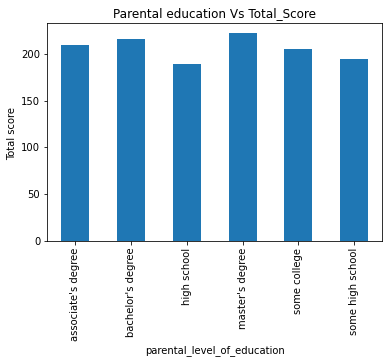

In [9]:
#What do you think about the students' parental level of education?
df.groupby('parental_level_of_education')['total_score'].mean().plot.bar() #plot function used is one available in pandas
plt.title("Parental education Vs Total_Score")
plt.ylabel("Total score ")
plt.show()

From the above data we can see that students whos parents are having masters degree score the most marks and students whos paranets have just went to highschool has lowest score.

<ipython-input-10-a6c4d4db02a5>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('gender')['math_score', 'reading_score', 'writing_score'].mean().plot.bar()


<AxesSubplot:xlabel='gender'>

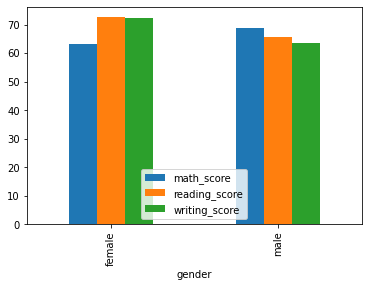

In [10]:
#Who scores the most on average for math, reading and writing based on-gender
df.groupby('gender')['math_score', 'reading_score', 'writing_score'].mean().plot.bar()

From the above data we can see that females have scored more in reading than in maths and writing. But for males the average score is more in maths.. also we can see the total average score of female is more comapared to male.

<ipython-input-11-9131d3c42adf>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('test_preparation_course')['math_score', 'reading_score', 'writing_score'].mean().plot.bar()


<AxesSubplot:xlabel='test_preparation_course'>

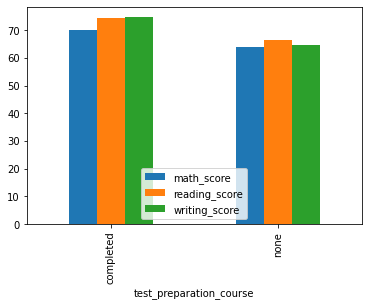

In [11]:
#Who scores the most on average for math, reading and writing based on-Test preparation course
df.groupby('test_preparation_course')['math_score', 'reading_score', 'writing_score'].mean().plot.bar()

Please who have completed the preperation score has scored more marks than people who have to completed the course. the course has helped to score more marks in writing

<ipython-input-12-38c554173781>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('gender')['math_score', 'reading_score', 'writing_score'].std().plot.bar()


<AxesSubplot:xlabel='gender'>

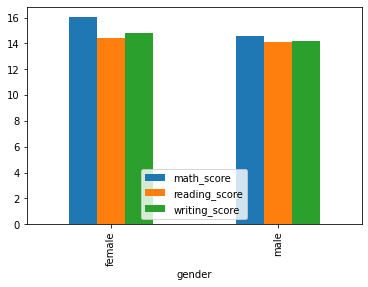

In [12]:
#What do you think about the scoring variation for math, reading and writing based on-gender
df.groupby('gender')['math_score', 'reading_score', 'writing_score'].std().plot.bar()

We can see that the scoring variation in female is more than the variation in males. This may be why the scores of female is more as compared to male. The deviation of score is more in maths and less in reading for both men and female.

<ipython-input-13-3a73fe6e4452>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('test_preparation_course')['math_score', 'reading_score', 'writing_score'].std().plot.bar()


<AxesSubplot:xlabel='test_preparation_course'>

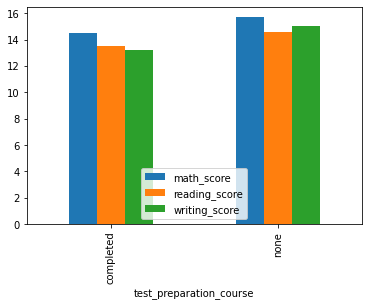

In [13]:
#What do you think about the scoring variation for math, reading and writing based on-Test preparation course
df.groupby('test_preparation_course')['math_score', 'reading_score', 'writing_score'].std().plot.bar()

We can see that the scoring variation in student who didn't prepare is more than the variation in people who preapered. The deviation of score is more in maths and less in reading for both.

In [14]:
#The management needs your help to give bonus points to the top 25% of students based on their maths score, 
#so how will you help the management to achieve this.
df['math_score'].describe()

count    1000.000000
mean       66.001000
std        15.569567
min         0.000000
25%        57.000000
50%        66.000000
75%        77.000000
max       100.000000
Name: math_score, dtype: float64

From the above data we come to know that students with marks 77 in maths are top 25%.

In [15]:
df[df.math_score > 77]

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
430,female,group A,some college,standard,completed,78,87,91,256
431,female,group B,bachelor's degree,free/reduced,none,78,79,76,233
432,female,group D,bachelor's degree,standard,none,78,82,79,239
433,female,group D,high school,standard,none,78,81,80,239
434,female,group D,bachelor's degree,free/reduced,none,78,90,93,261
...,...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81,267
996,male,group A,some college,standard,completed,100,96,86,282
997,male,group D,some college,standard,completed,100,97,99,296
998,male,group E,associate's degree,free/reduced,completed,100,100,93,293


231 students from 1000 have scored more than 75% or we can say they are the top 25% 